In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 22
})

In [2]:
df_kems = kem_data_process("kem_bench_20250115_100_iter.csv")

df_kems

,Algorithm,Iteration,KeyGen(ms),Encaps(ms),Decaps(ms),TotalTime(ms)
300,qkd_frodo640aes,1,0.308,0.377,0.324,1.009
301,qkd_frodo640aes,2,0.279,0.377,0.324,0.980
302,qkd_frodo640aes,3,0.279,0.376,0.322,0.977
303,qkd_frodo640aes,4,0.279,0.373,0.320,0.972
304,qkd_frodo640aes,5,0.278,0.376,0.323,0.977
...,...,...,...,...,...,...
7095,qkd_hqc256,96,6.204,12.379,18.645,37.228
7096,qkd_hqc256,97,6.199,12.384,18.665,37.248
7097,qkd_hqc256,98,6.225,12.426,18.680,37.331
7098,qkd_hqc256,99,6.082,11.931,18.658,36.671


In [3]:
df_kems[df_kems['Algorithm']=='qkd_mlkem1024']

,Algorithm,Iteration,KeyGen(ms),Encaps(ms),Decaps(ms),TotalTime(ms)
4800,qkd_mlkem1024,1,0.095,0.050,0.014,0.159
4801,qkd_mlkem1024,2,0.056,0.049,0.014,0.119
4802,qkd_mlkem1024,3,0.053,0.048,0.013,0.114
4803,qkd_mlkem1024,4,0.054,0.049,0.013,0.116
4804,qkd_mlkem1024,5,0.055,0.049,0.013,0.117
...,...,...,...,...,...,...
4895,qkd_mlkem1024,96,0.052,0.049,0.013,0.114
4896,qkd_mlkem1024,97,0.052,0.049,0.013,0.114
4897,qkd_mlkem1024,98,0.053,0.048,0.013,0.114
4898,qkd_mlkem1024,99,0.053,0.050,0.013,0.116


In [4]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_kems[df_kems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [5]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

,NumIterations,KeyGen(ms)_mean,KeyGen(ms)_std,KeyGen(ms)_min,KeyGen(ms)_max,Encaps(ms)_mean,Encaps(ms)_std,Encaps(ms)_min,Encaps(ms)_max,Decaps(ms)_mean,Decaps(ms)_std,Decaps(ms)_min,Decaps(ms)_max,TotalTime(ms)_mean,TotalTime(ms)_std,TotalTime(ms)_min,TotalTime(ms)_max
Algorithm,,,,,,,,,,,,,,,,,
qkd_bikel1,98,0.193,0.021,0.173,0.273,0.074,0.015,0.066,0.151,0.530,0.039,0.460,0.641,0.797,0.046,0.721,0.957
qkd_bikel3,98,0.425,0.010,0.416,0.463,0.110,0.004,0.107,0.130,1.475,0.025,1.458,1.660,2.010,0.034,1.986,2.239
qkd_bikel5,98,0.992,0.011,0.983,1.048,0.188,0.004,0.185,0.217,3.922,0.022,3.907,4.051,5.102,0.029,5.079,5.245
qkd_frodo1344aes,98,0.816,0.016,0.797,0.893,1.102,0.017,1.091,1.184,1.020,0.016,1.010,1.113,2.938,0.037,2.905,3.113
qkd_frodo1344shake,98,2.683,0.029,2.663,2.791,2.848,0.039,2.818,2.988,2.772,0.033,2.748,2.903,8.303,0.085,8.241,8.660
qkd_frodo640aes,98,0.282,0.005,0.277,0.302,0.377,0.005,0.370,0.394,0.327,0.009,0.319,0.406,0.986,0.012,0.970,1.060
qkd_frodo640shake,98,0.732,0.020,0.696,0.767,0.794,0.025,0.751,0.838,0.743,0.025,0.701,0.786,2.269,0.067,2.156,2.340
qkd_frodo976aes,98,0.477,0.010,0.463,0.527,0.655,0.005,0.649,0.691,0.591,0.004,0.585,0.612,1.722,0.013,1.707,1.780
qkd_frodo976shake,98,1.535,0.034,1.510,1.721,1.633,0.023,1.613,1.728,1.569,0.030,1.543,1.694,4.738,0.062,4.672,4.944


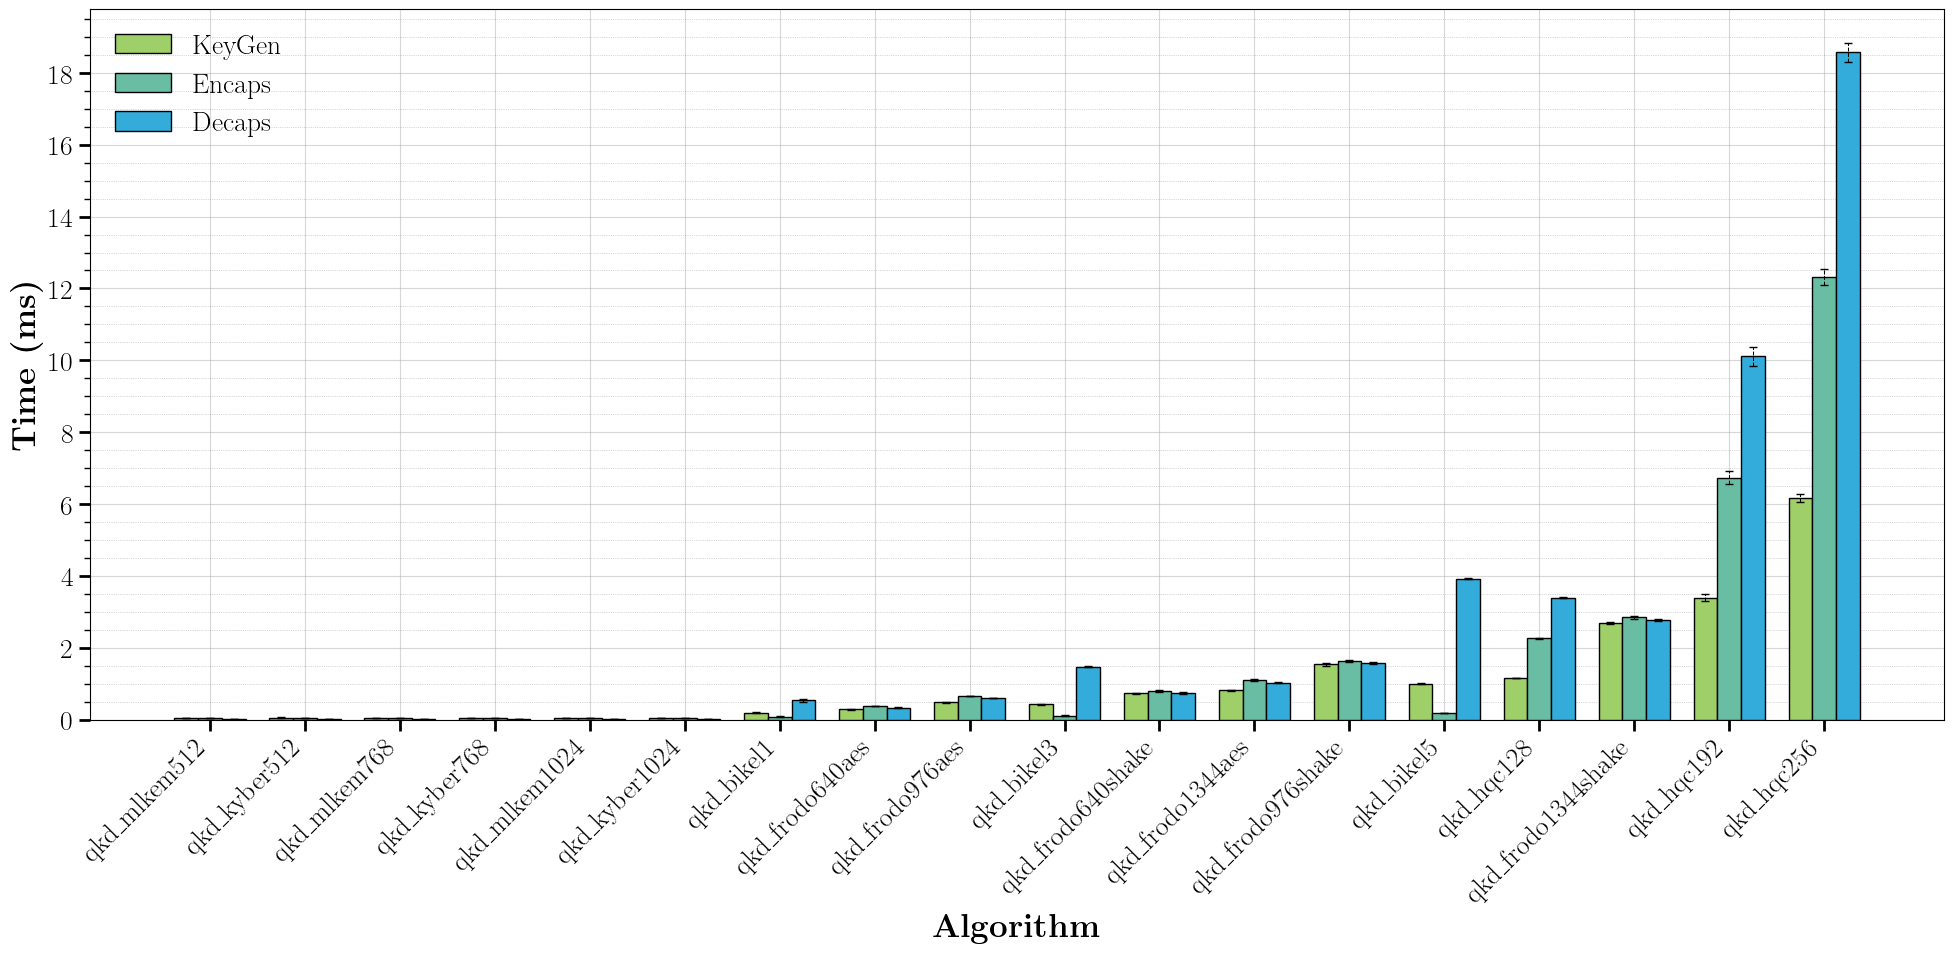

In [6]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_ops_times.pdf", y_start=None)

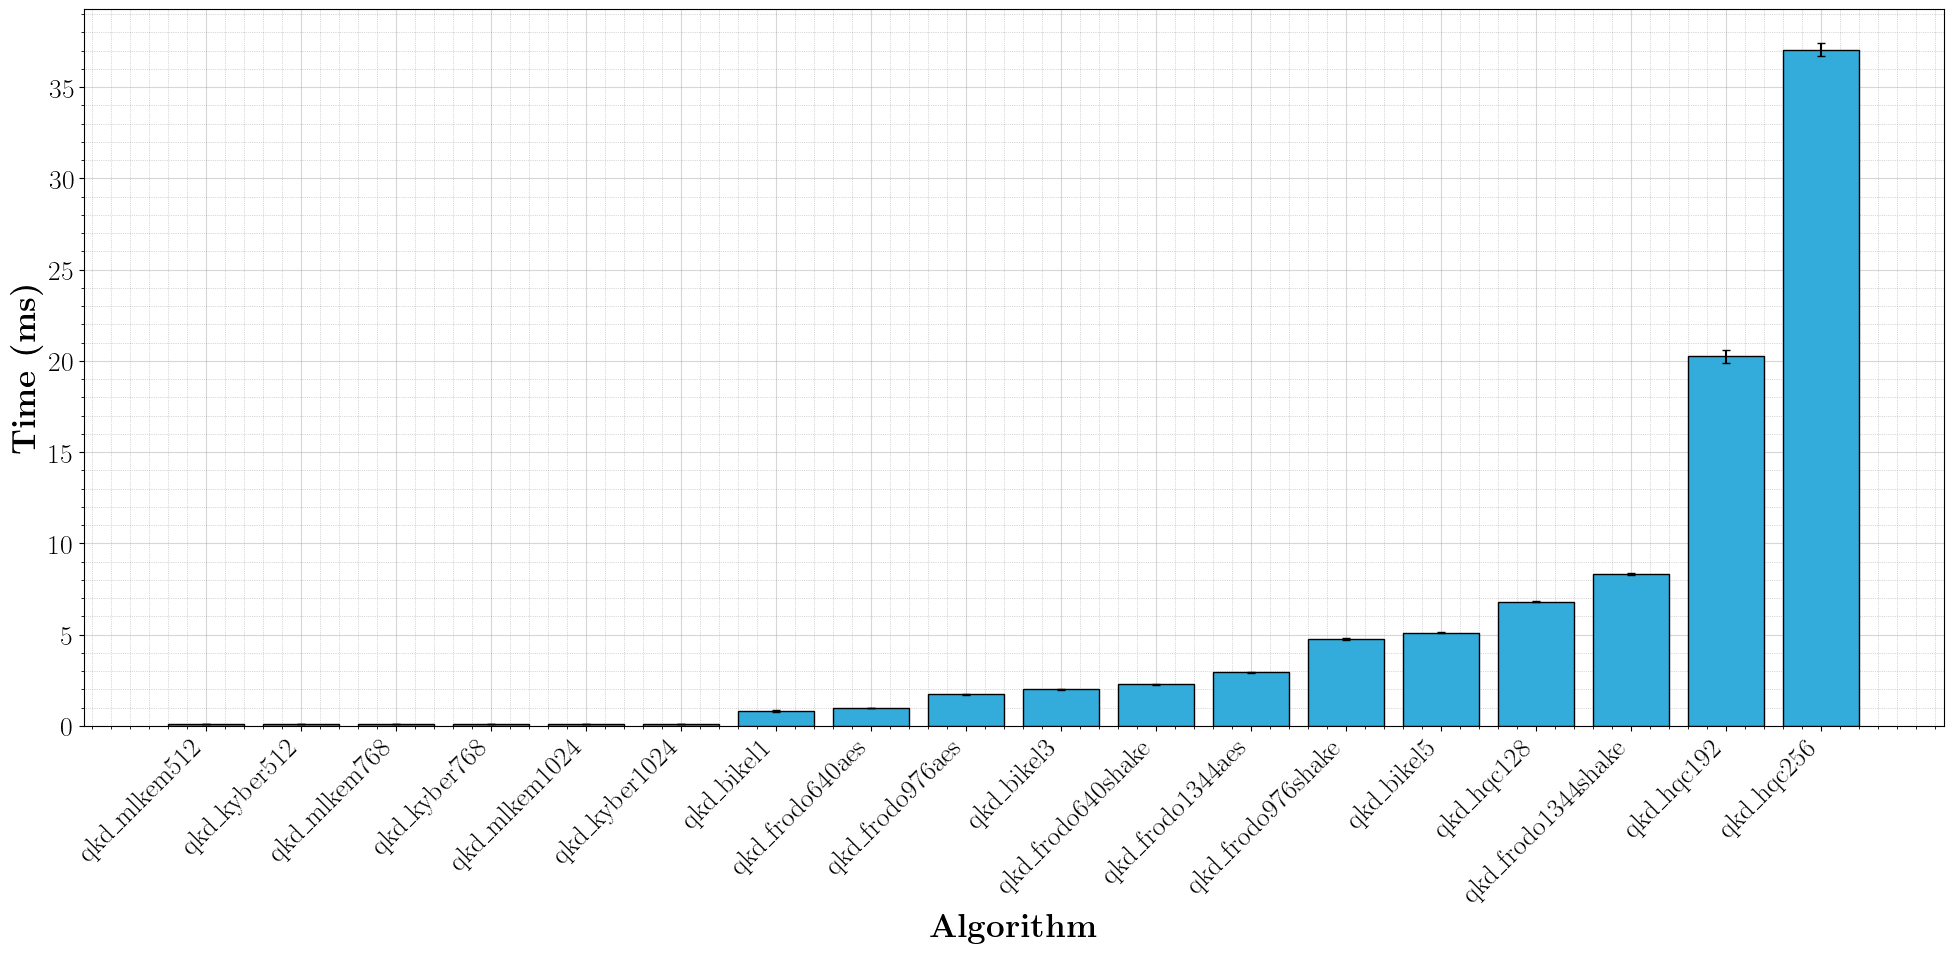

In [7]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times.pdf", y_start=None)

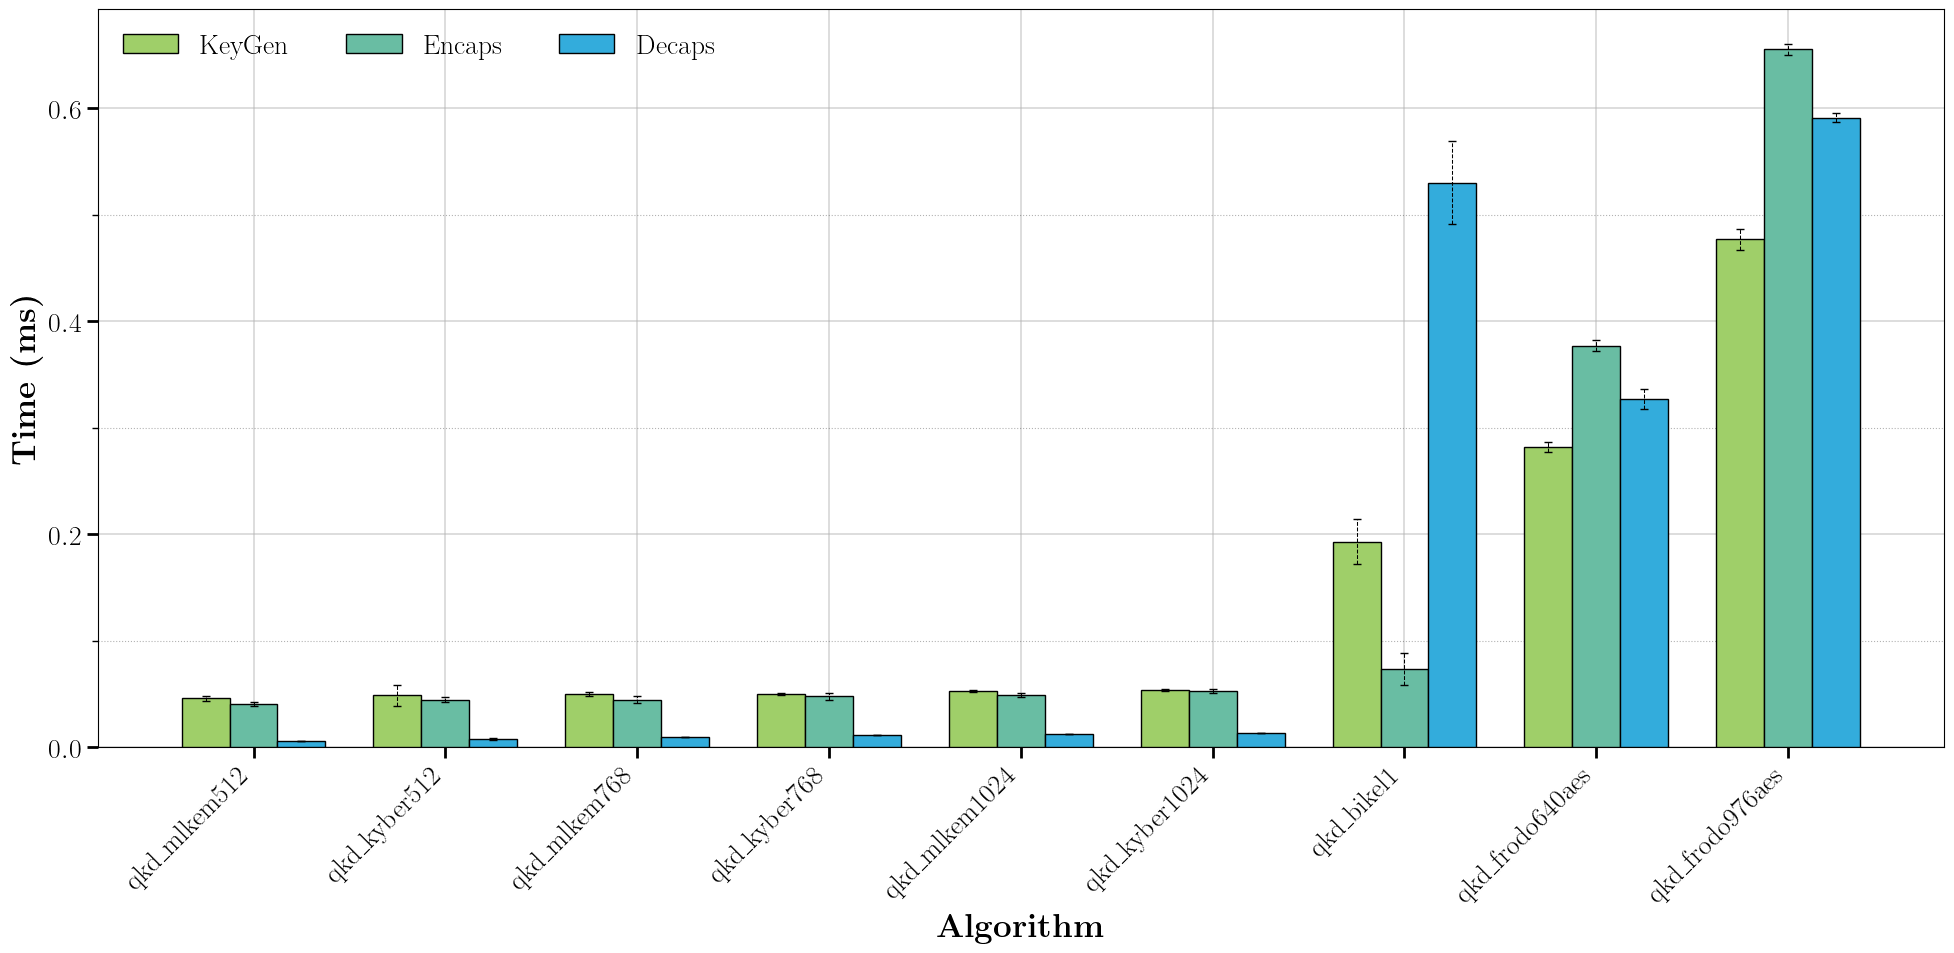

In [8]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times.pdf", log_scale=False)

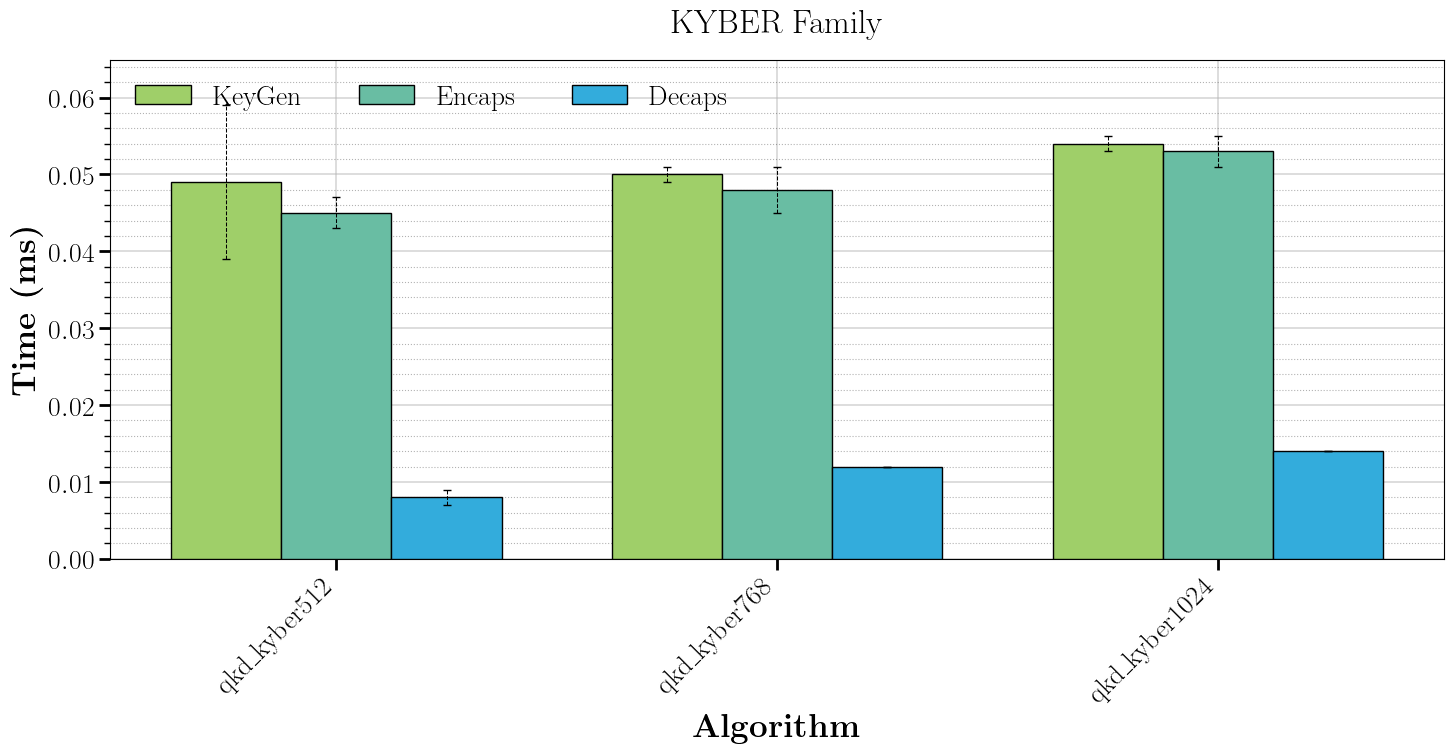

In [9]:
plot_kem_family(input_df=df_kems_stats, family='kyber', error_suffix="_std", plot_title="kyber_times.pdf", log_scale=False)

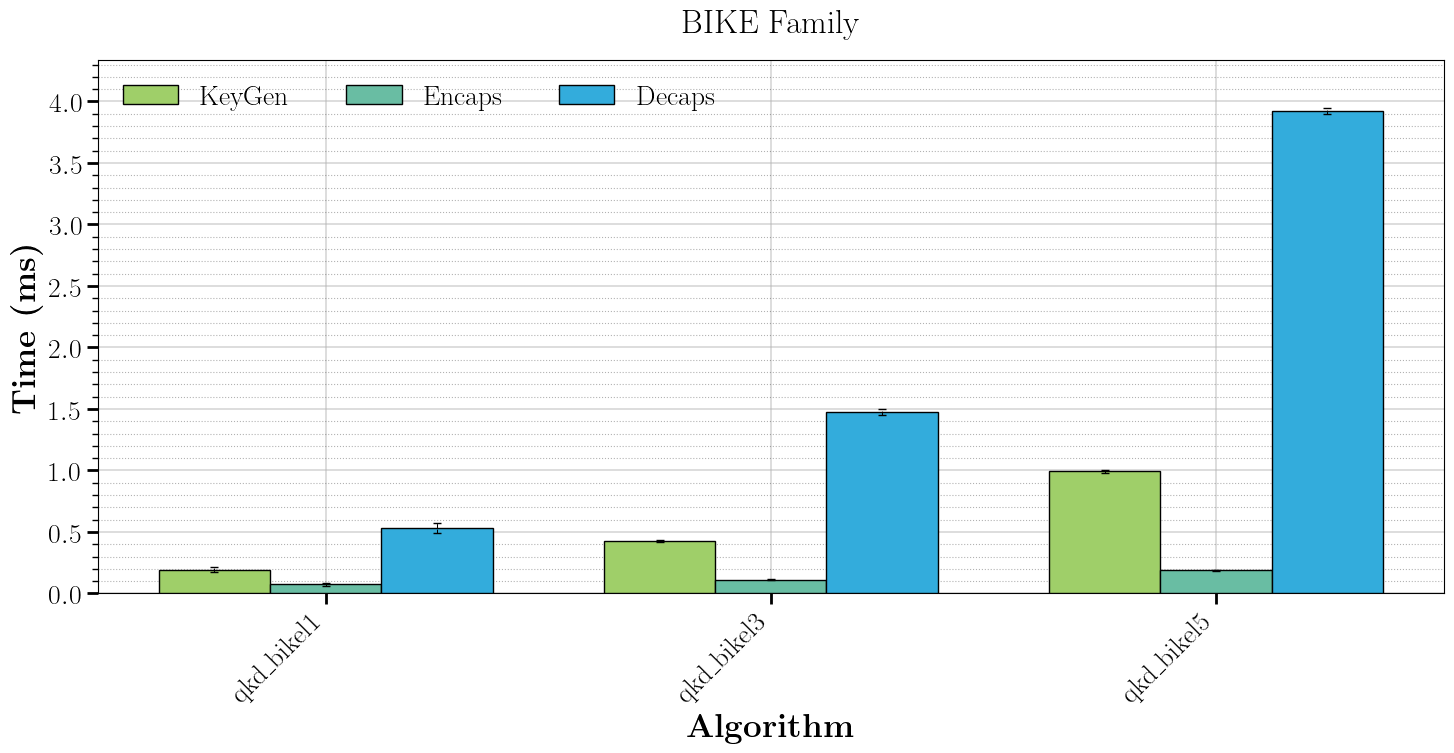

In [10]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

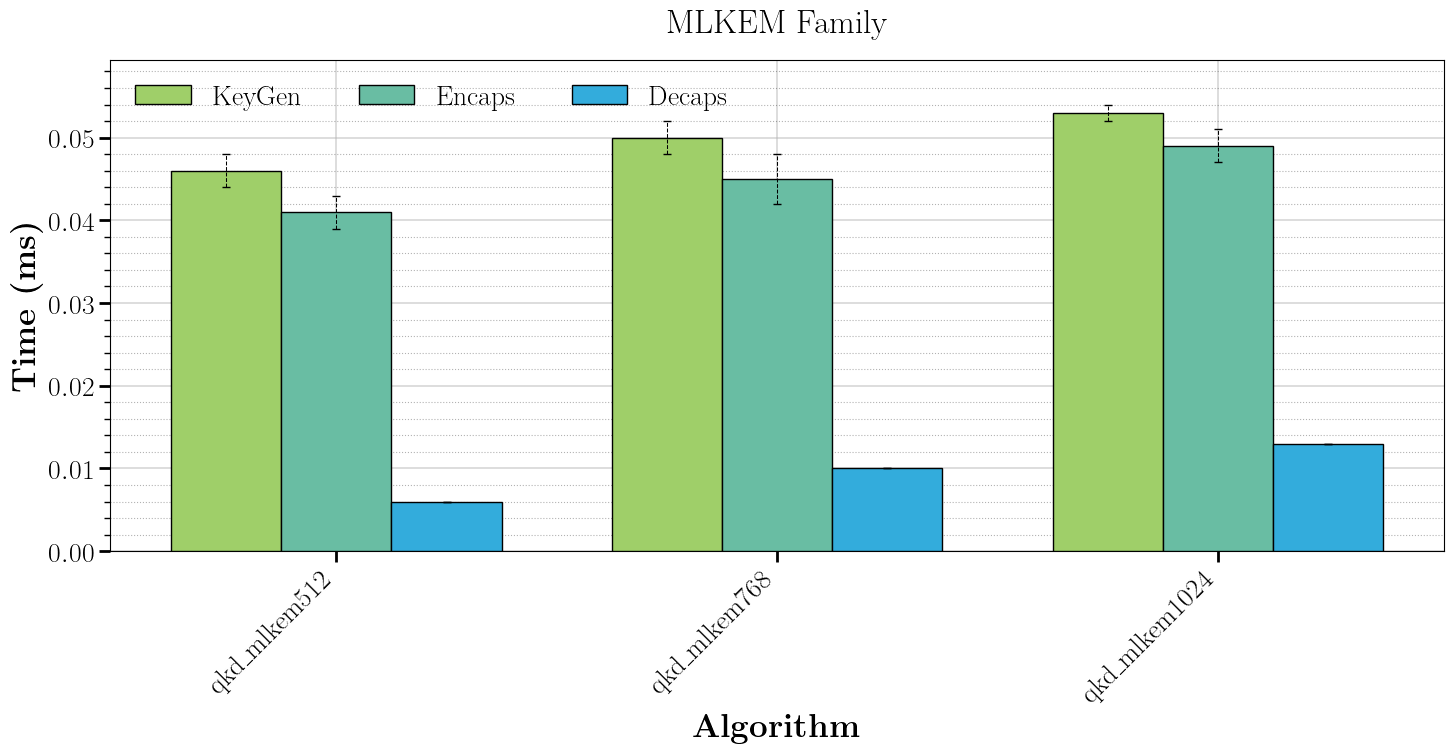

In [11]:
plot_kem_family(input_df=df_kems_stats, family='mlkem', error_suffix="_std", plot_title="mlkem_times.pdf", log_scale=False)

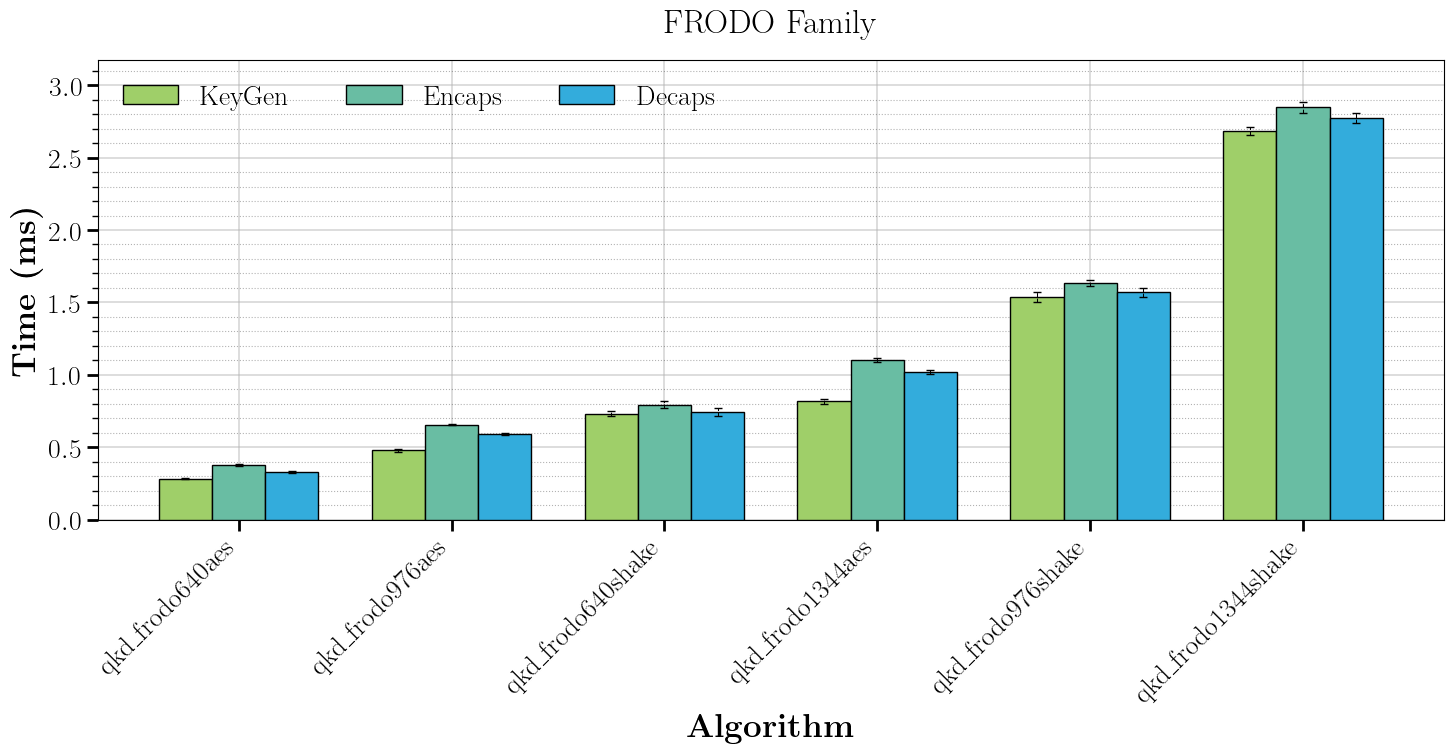

In [12]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

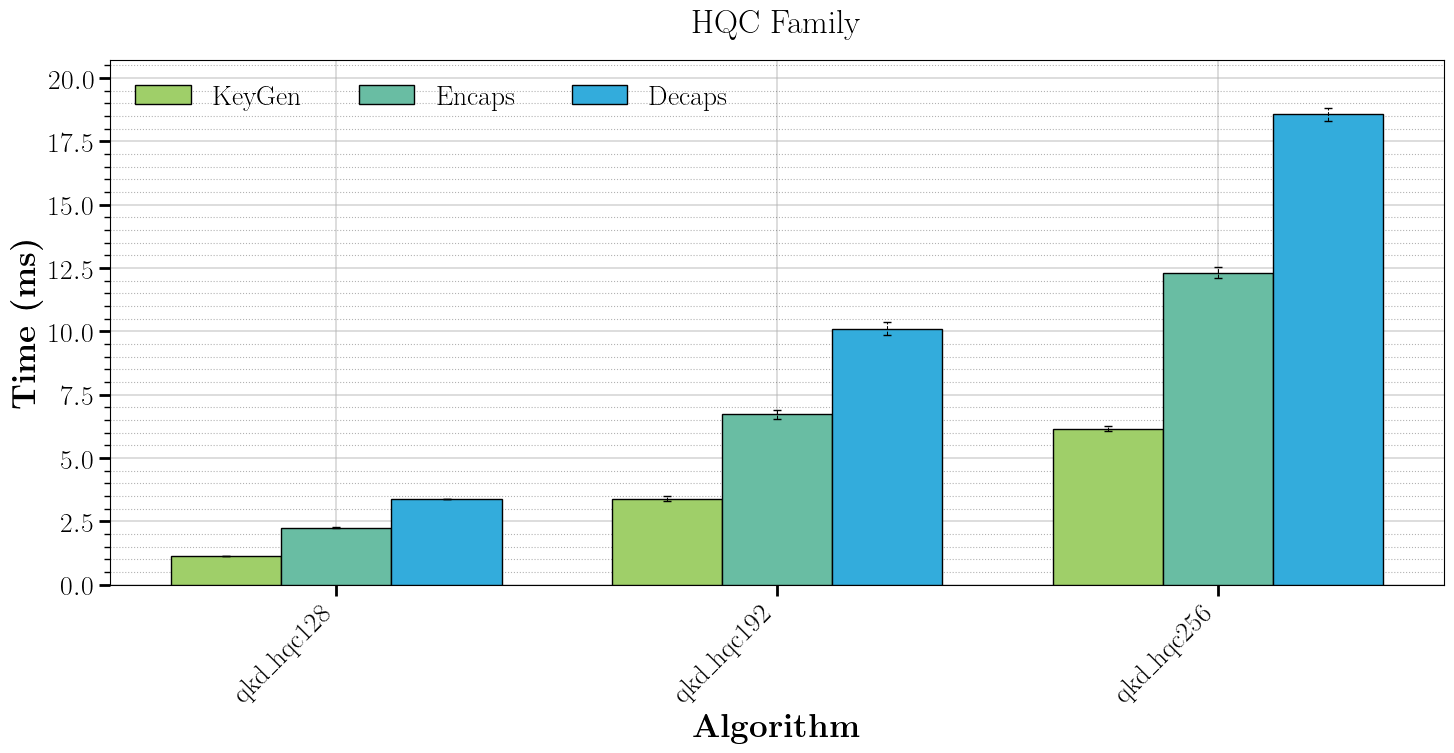

In [13]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

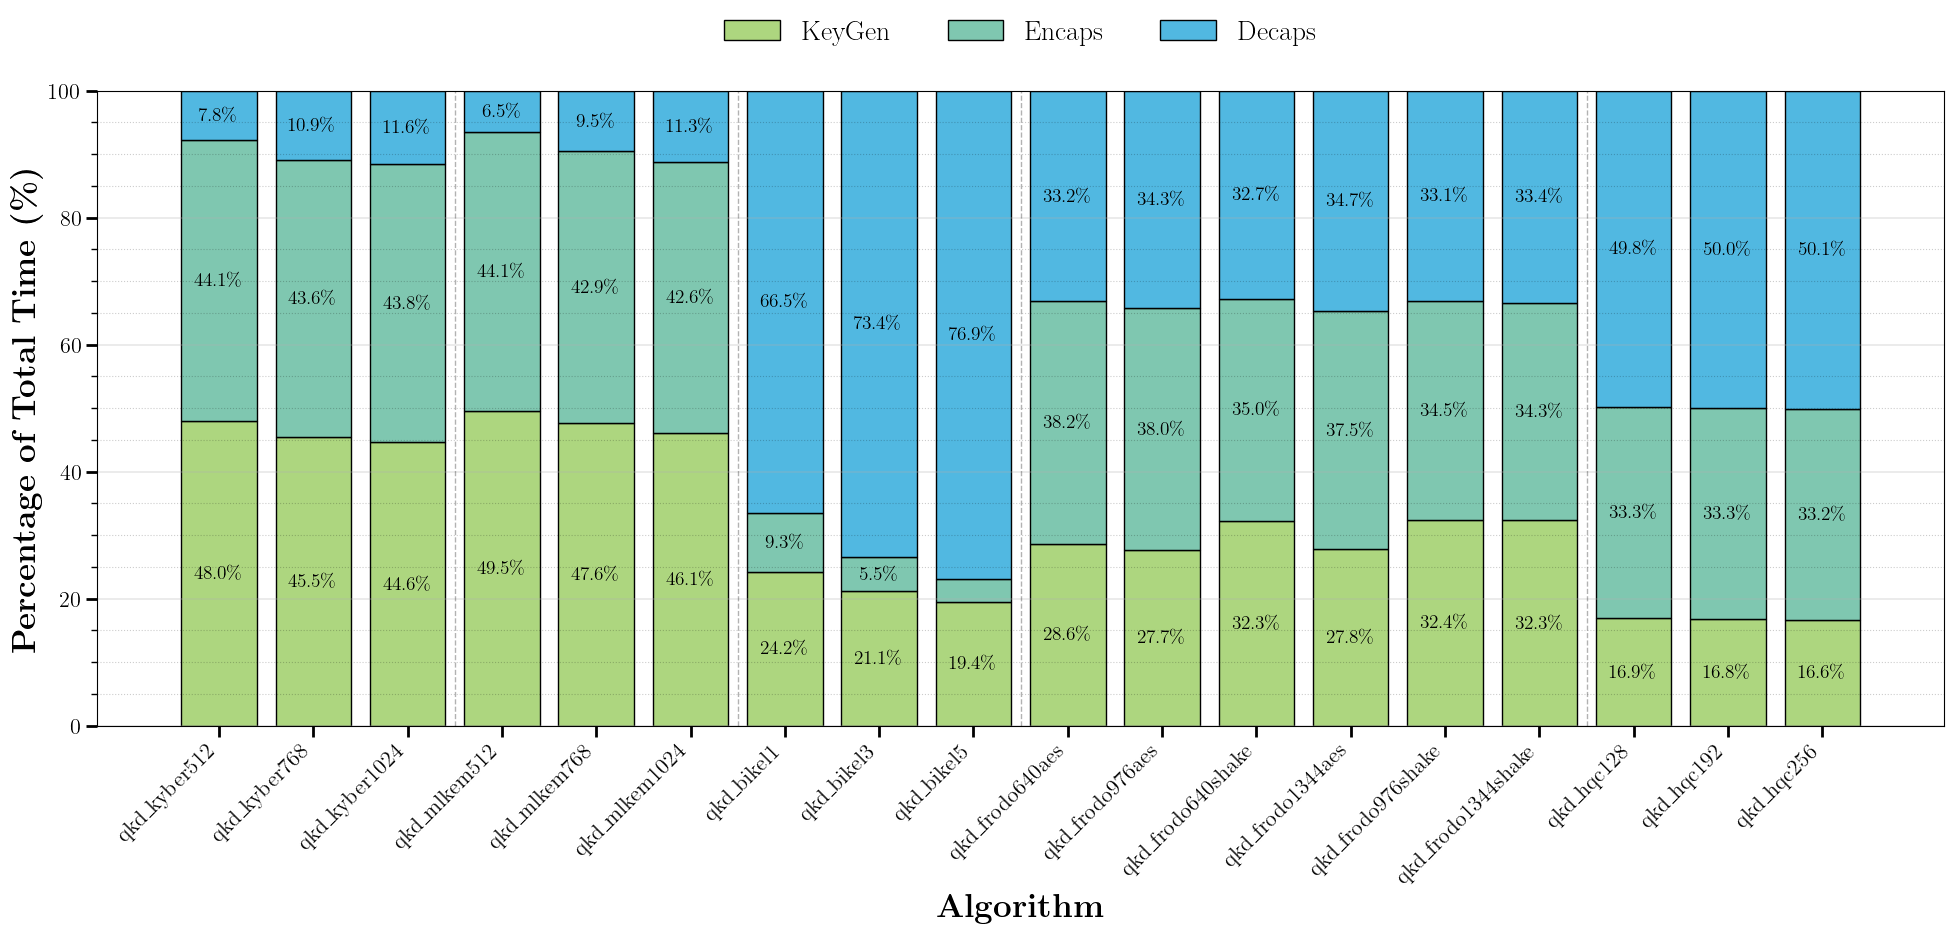


Operation Percentages:
                    KeyGen(ms)_mean  Encaps(ms)_mean  Decaps(ms)_mean
Algorithm                                                            
qkd_kyber512                  48.04            44.12             7.84
qkd_kyber768                  45.45            43.64            10.91
qkd_kyber1024                 44.63            43.80            11.57
qkd_mlkem512                  49.46            44.09             6.45
qkd_mlkem768                  47.62            42.86             9.52
qkd_mlkem1024                 46.09            42.61            11.30
qkd_bikel1                    24.22             9.28            66.50
qkd_bikel3                    21.14             5.47            73.38
qkd_bikel5                    19.44             3.68            76.87
qkd_frodo640aes               28.60            38.24            33.16
qkd_frodo976aes               27.68            38.02            34.30
qkd_frodo640shake             32.26            34.99            32

In [14]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="kems_ops_weights.pdf")

In [15]:
compare_data = load_comparison_data(csv_path="kem_bench_20250115_100_iter.csv")
compare_stats = generate_comparison_stats(compare_data)

compare_stats

,NumIterations,KeyGen(ms)_mean,KeyGen(ms)_std,KeyGen(ms)_min,KeyGen(ms)_max,Encaps(ms)_mean,Encaps(ms)_std,Encaps(ms)_min,Encaps(ms)_max,Decaps(ms)_mean,Decaps(ms)_std,Decaps(ms)_min,Decaps(ms)_max,TotalTime_mean,TotalTime_std,TotalTime_min,TotalTime_max
Algorithm,,,,,,,,,,,,,,,,,
bikel1,100,0.143,0.005,0.136,0.166,0.033,0.001,0.032,0.040,0.497,0.020,0.448,0.547,0.673,0.021,0.621,0.729
bikel3,100,0.418,0.038,0.382,0.496,0.079,0.017,0.073,0.166,1.574,0.058,1.473,1.706,2.071,0.070,1.935,2.272
bikel5,100,0.951,0.012,0.946,1.055,0.152,0.002,0.150,0.167,3.916,0.005,3.907,3.939,5.019,0.014,5.005,5.123
frodo1344aes,100,0.778,0.021,0.726,0.859,1.071,0.018,0.997,1.161,1.026,0.021,0.962,1.137,2.875,0.047,2.689,3.065
frodo1344shake,100,2.632,0.070,2.461,2.830,2.776,0.072,2.595,2.918,2.750,0.113,2.565,3.613,8.158,0.208,7.628,8.758
frodo640aes,100,0.290,0.222,0.240,2.349,0.373,0.104,0.336,0.763,0.352,0.096,0.319,0.705,1.016,0.382,0.900,3.817
frodo640shake,100,0.713,0.019,0.655,0.860,0.785,0.054,0.771,1.311,0.769,0.020,0.753,0.893,2.267,0.073,2.189,2.936
frodo976aes,100,0.439,0.009,0.428,0.463,0.622,0.005,0.617,0.661,0.591,0.006,0.584,0.635,1.652,0.013,1.636,1.725
frodo976shake,100,1.479,0.010,1.469,1.527,1.584,0.009,1.576,1.613,1.549,0.009,1.542,1.606,4.613,0.015,4.592,4.667


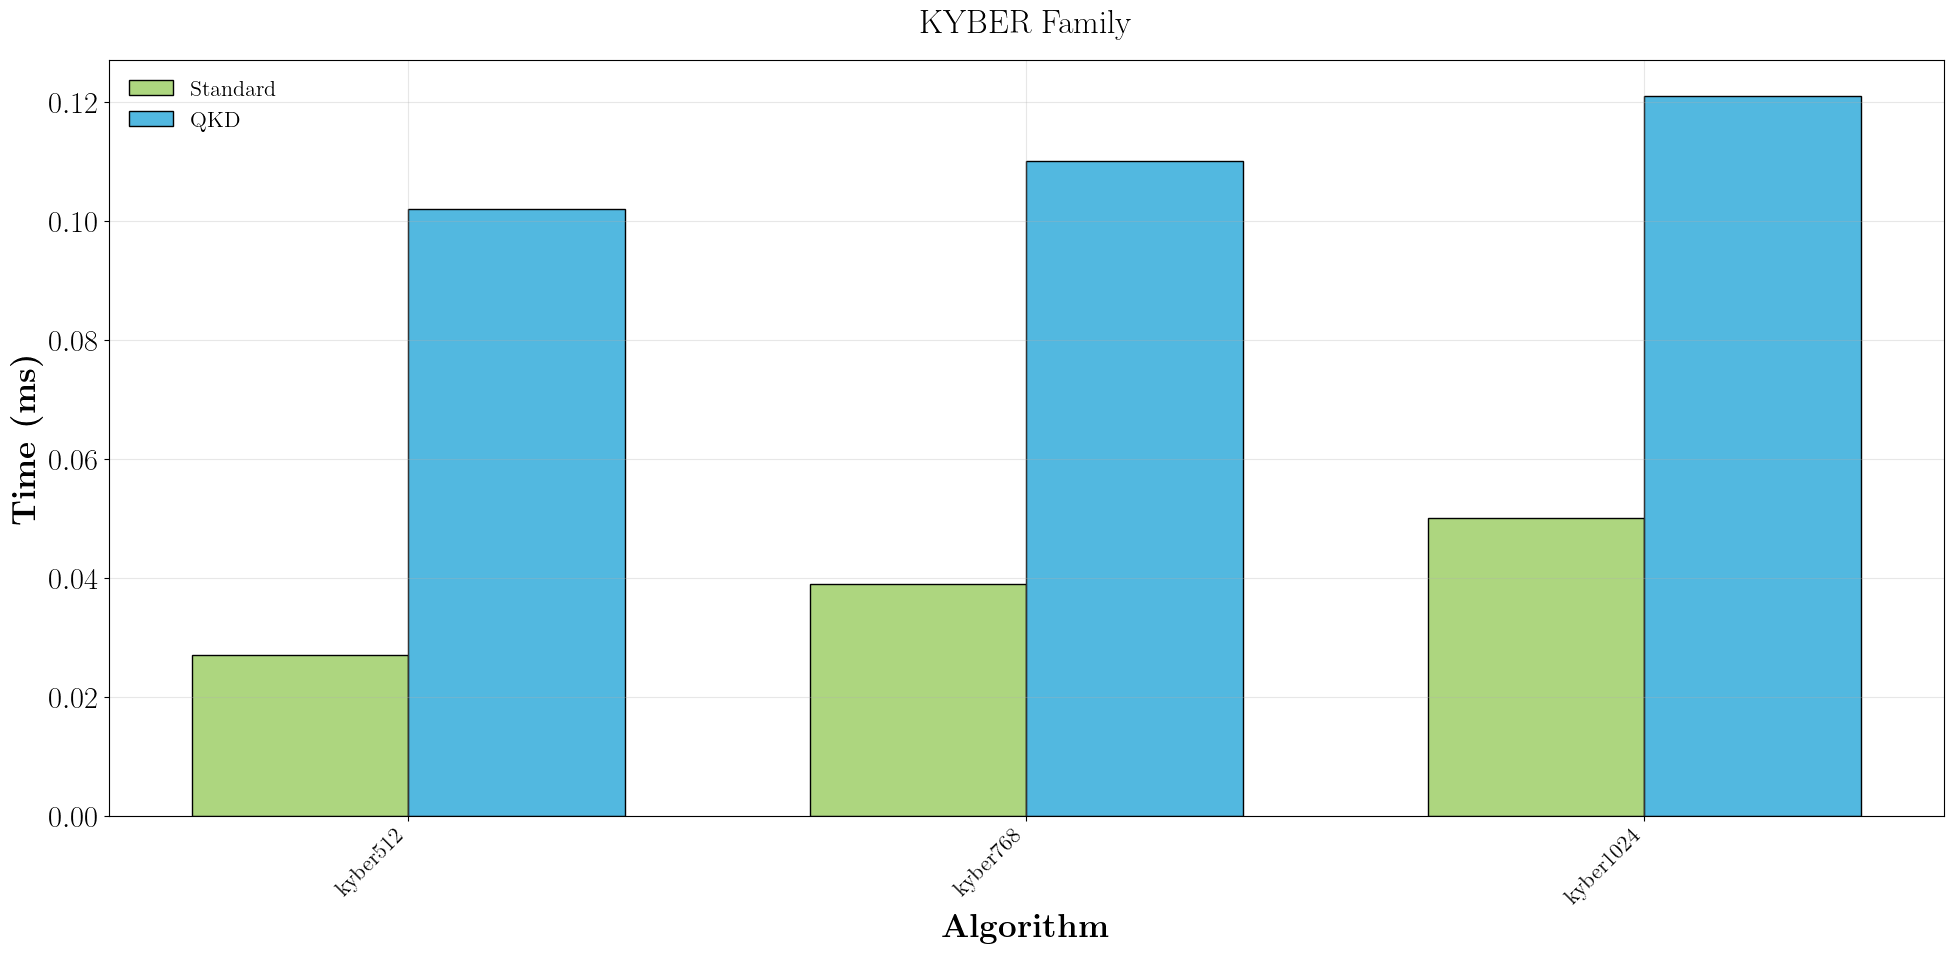

In [16]:
plot_kem_comparison(comparison_stats=compare_stats, family="kyber", operation='TotalTime', plot_title="kyber_comparison.pdf")

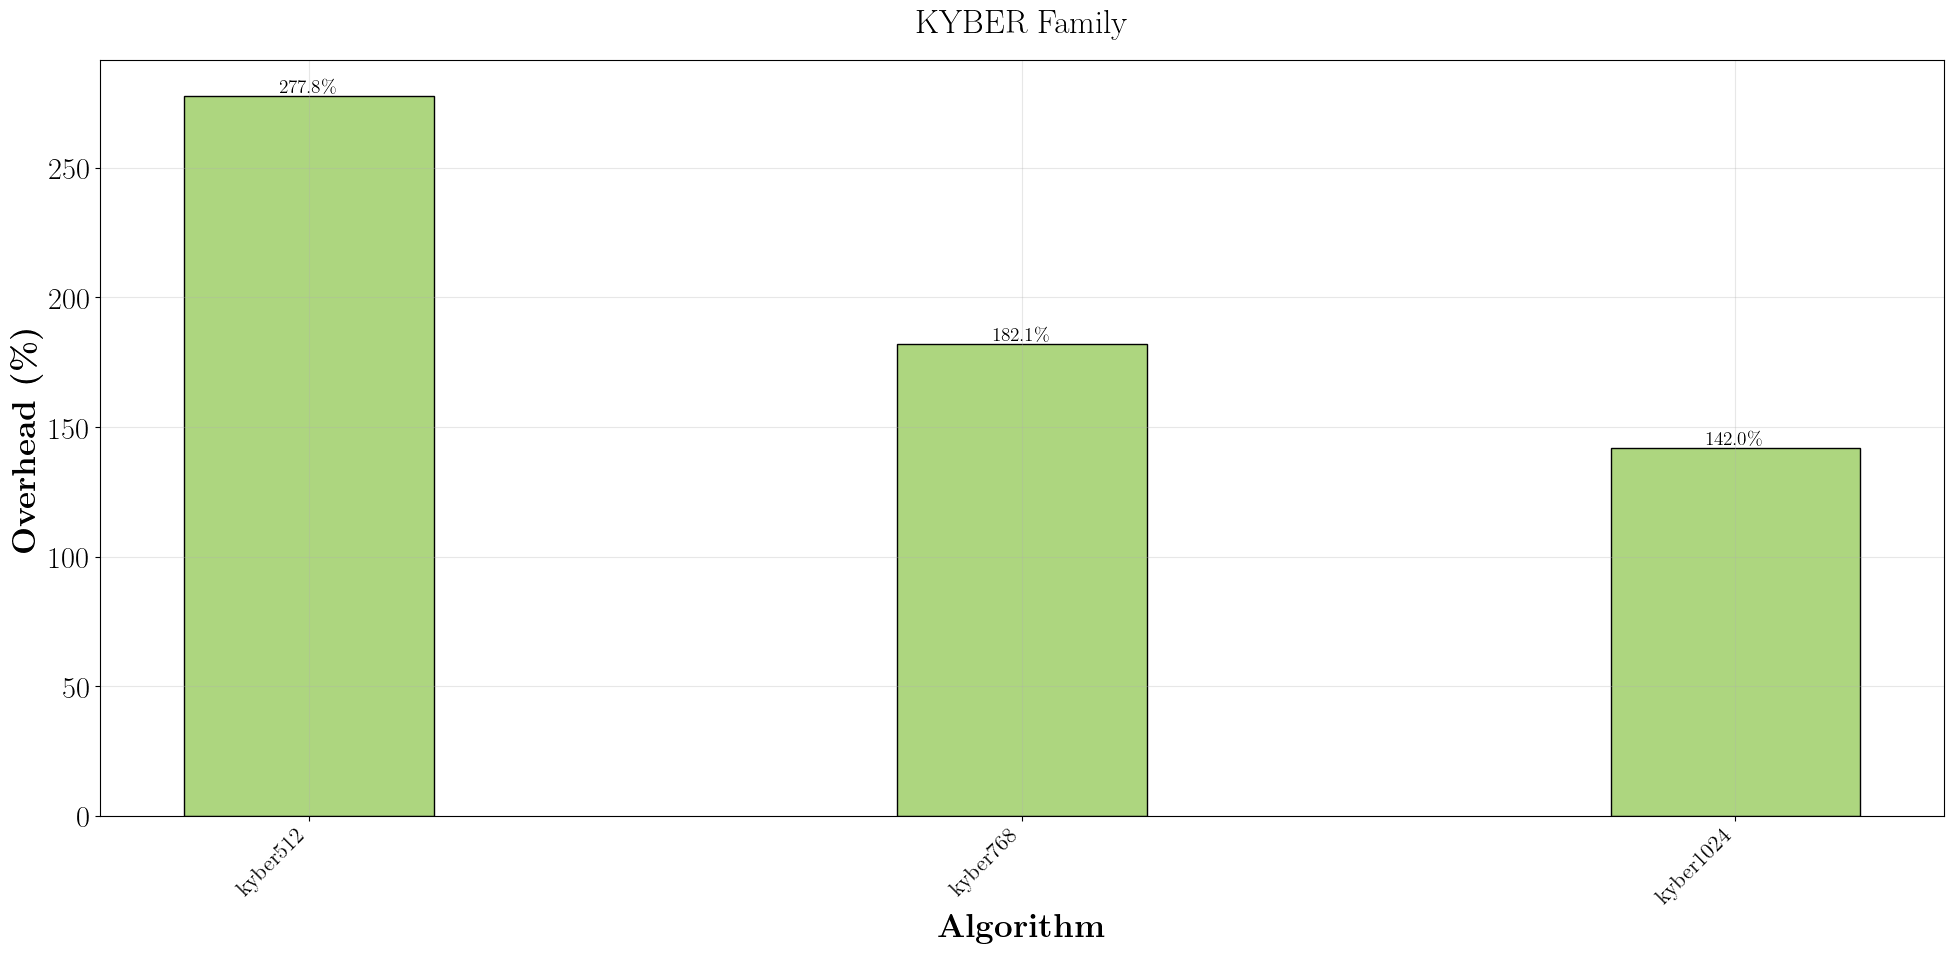

In [17]:
plot_kem_comparison(comparison_stats=compare_stats, family="kyber", operation='TotalTime', overhead=True, plot_title="kyber_comparison_overhead.pdf")

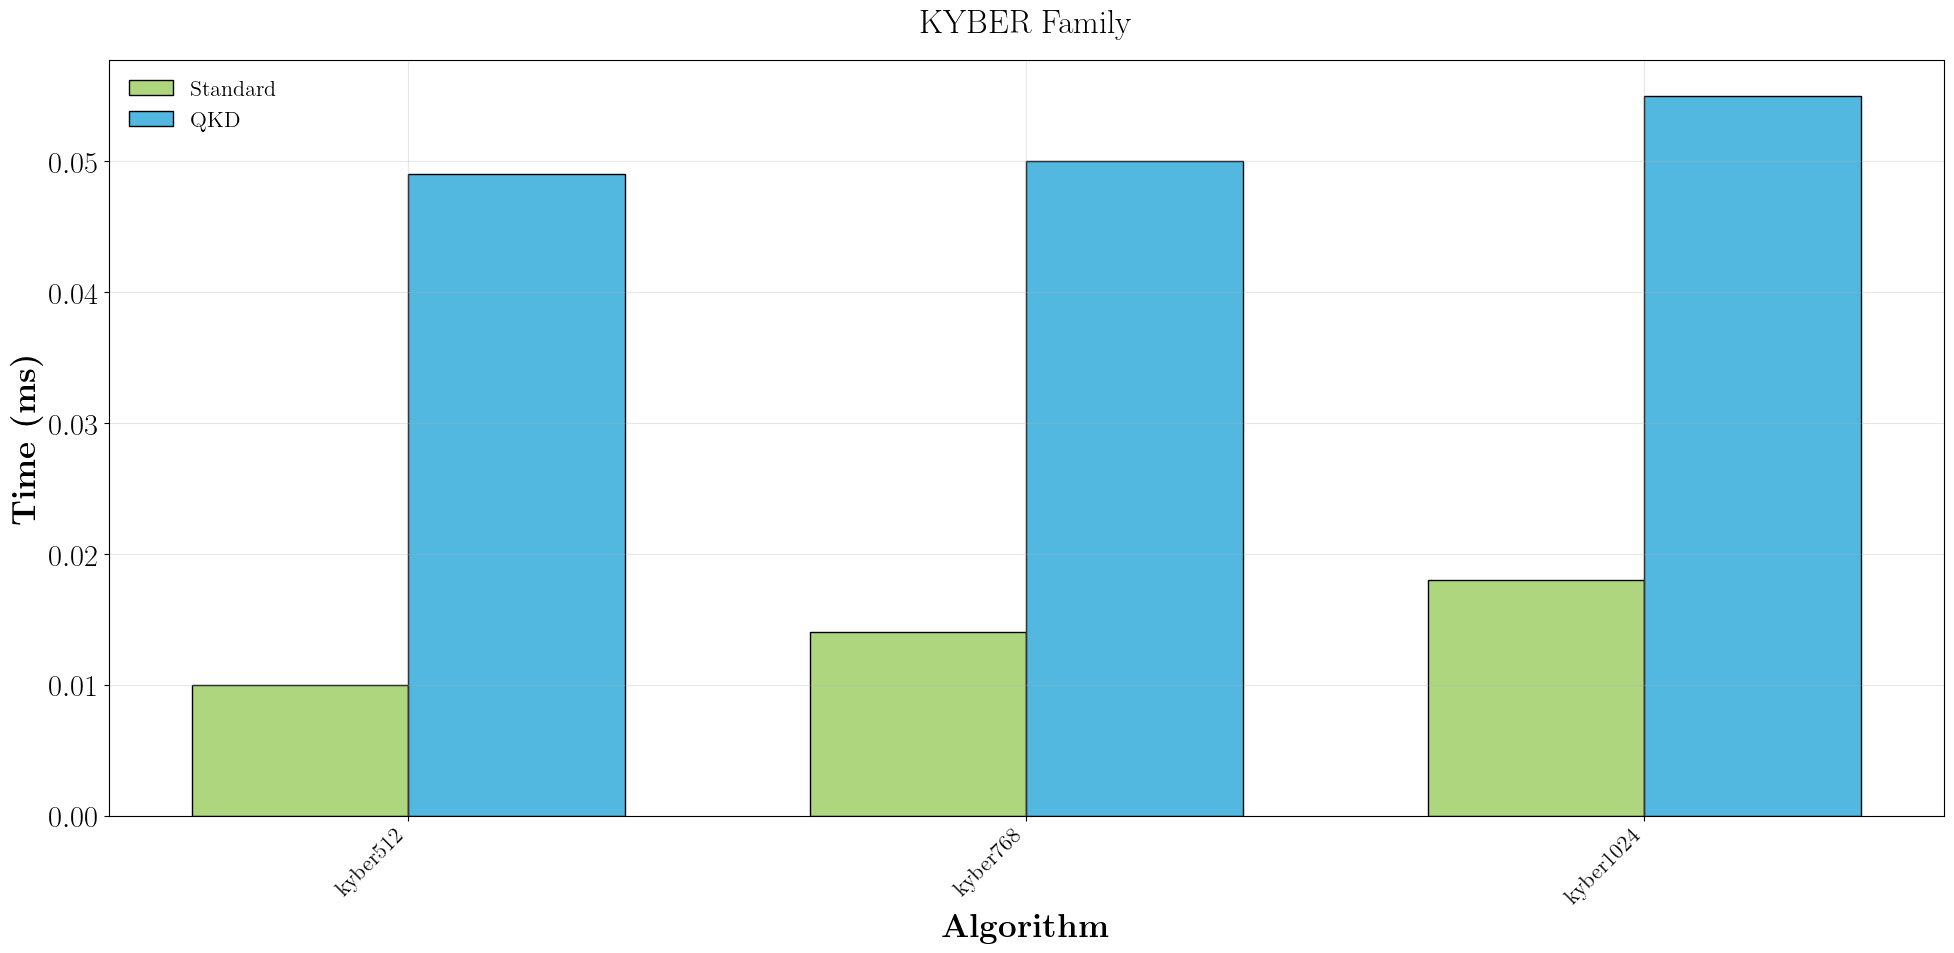

In [18]:
plot_kem_comparison(comparison_stats=compare_stats, family="kyber", operation='KeyGen(ms)', plot_title="kyber_comparison_keygen.pdf")

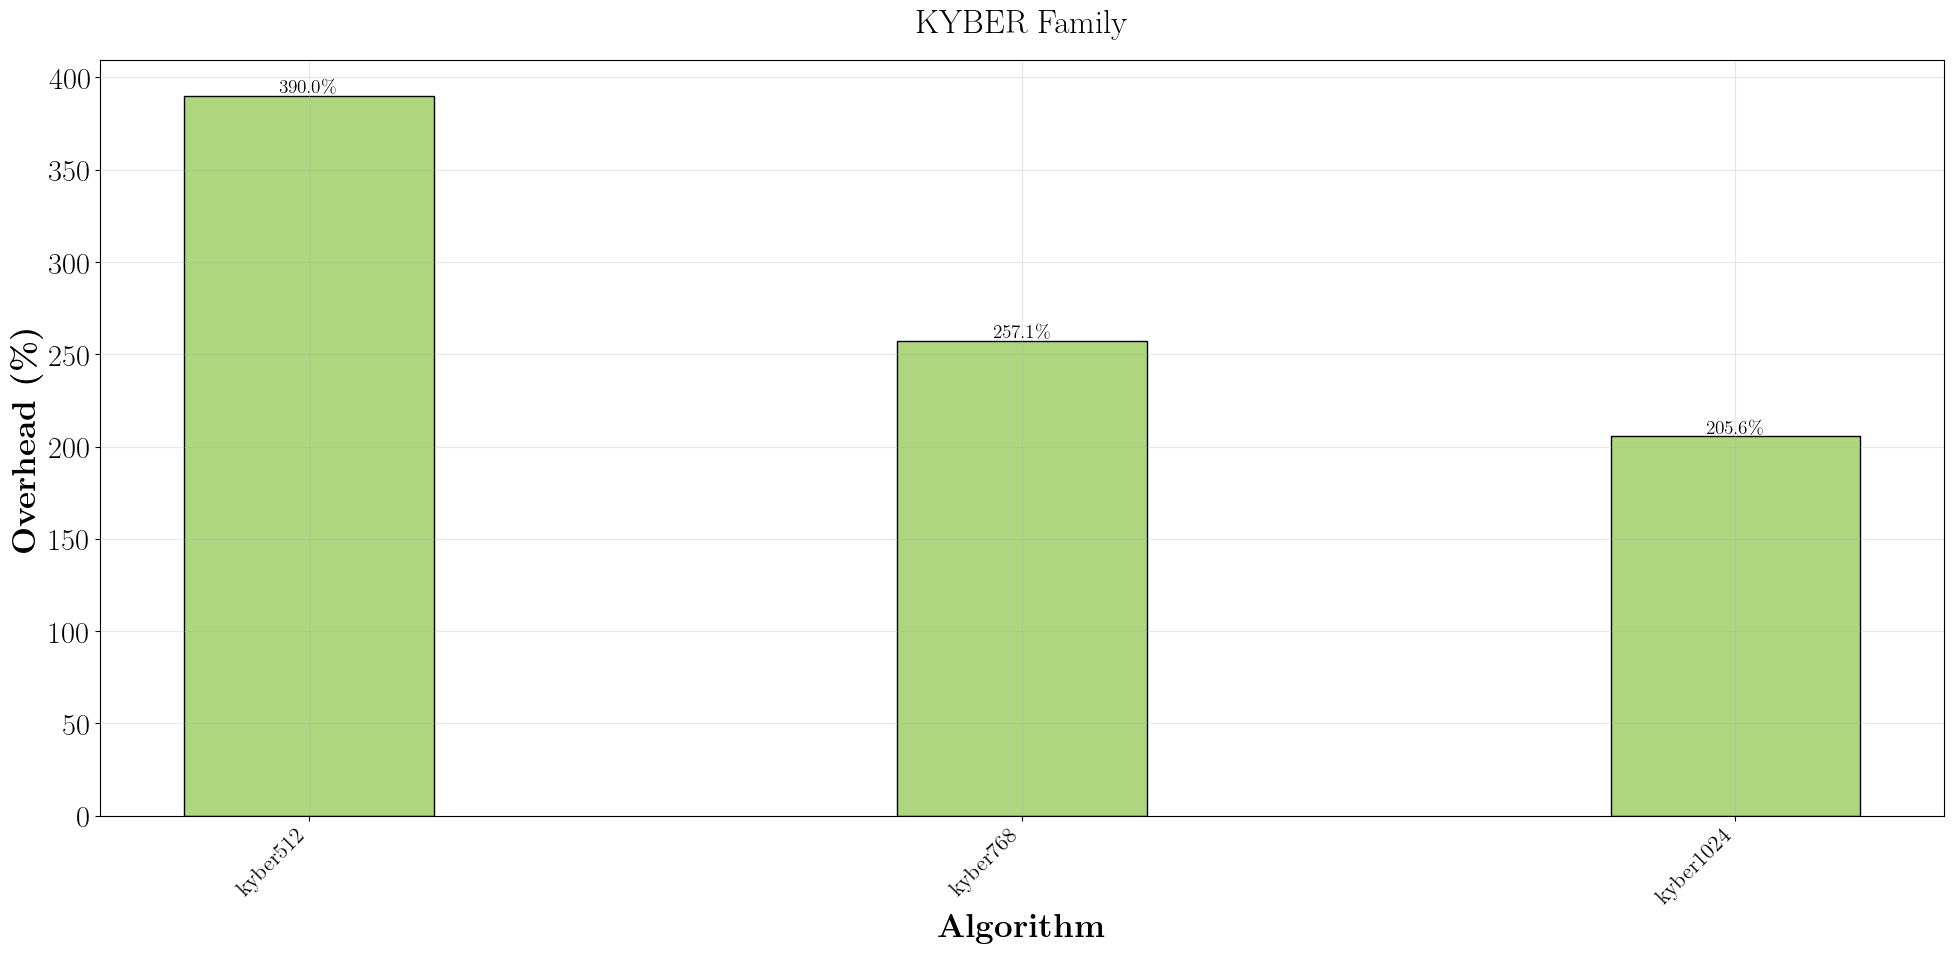

In [19]:
plot_kem_comparison(comparison_stats=compare_stats, family="kyber", operation='KeyGen(ms)', overhead=True, plot_title="kyber_comparison_keygen_overhead.pdf")

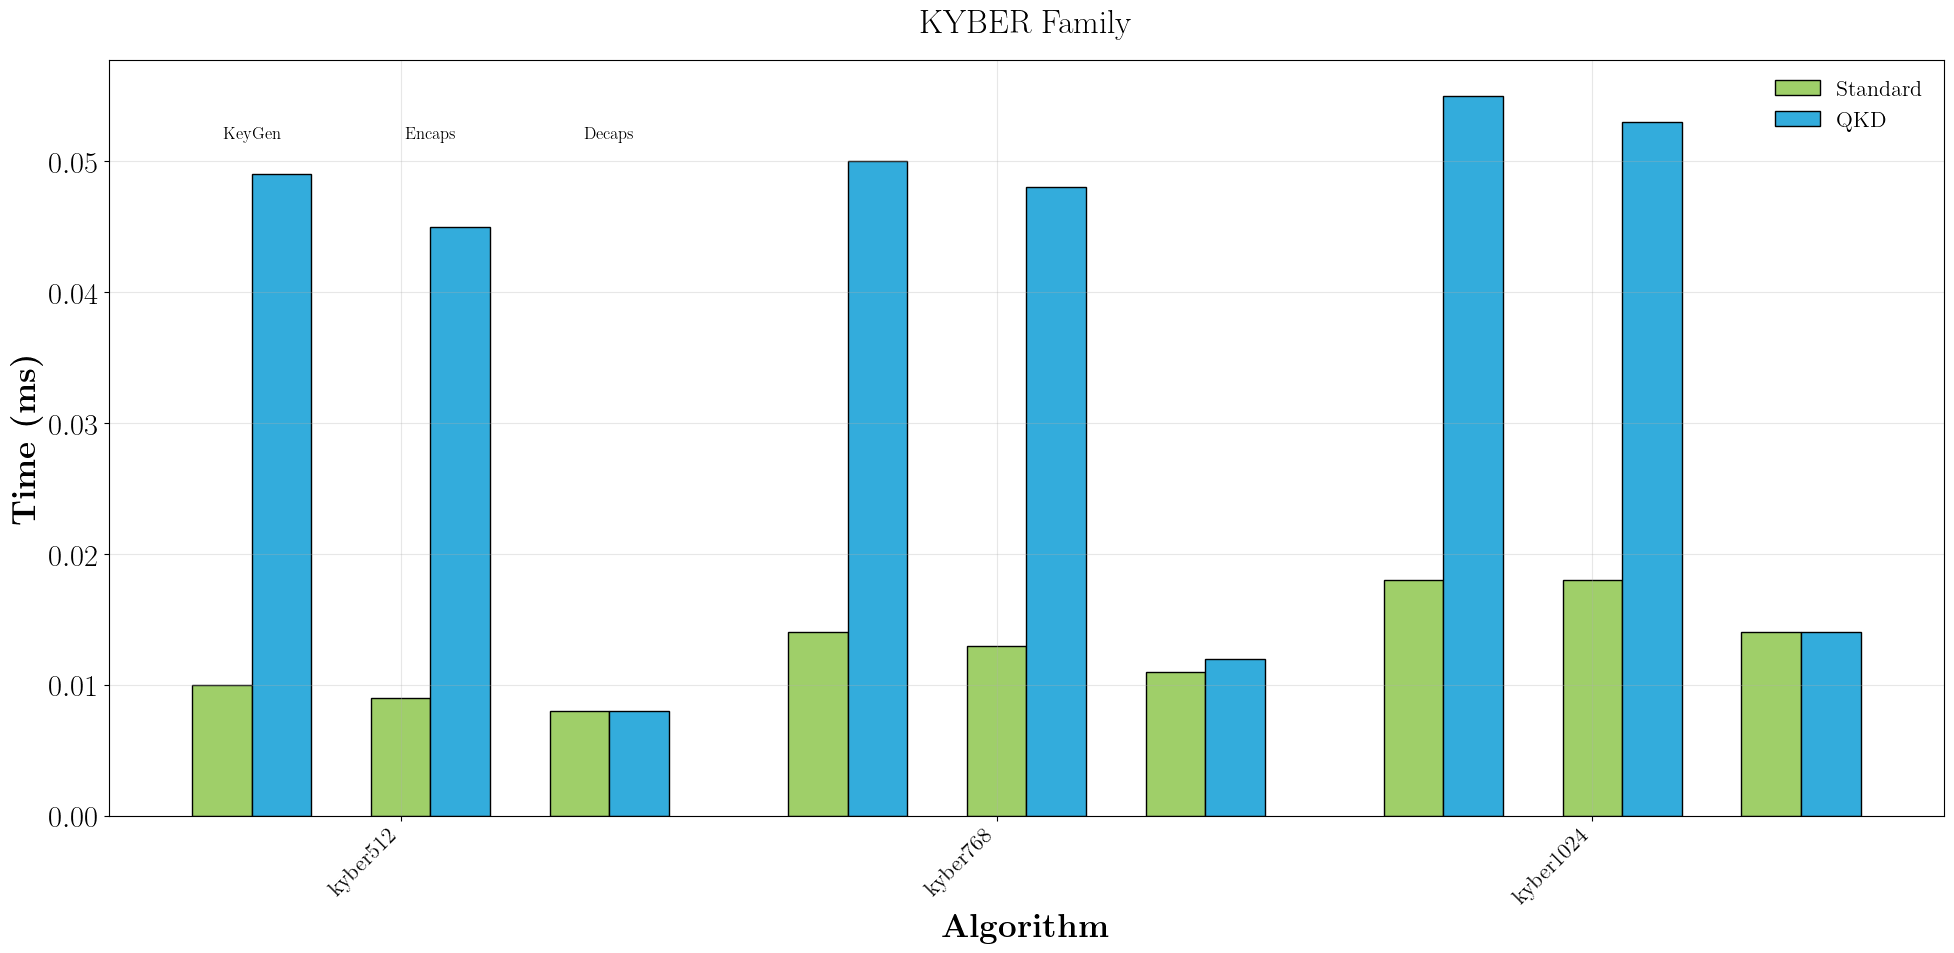

In [20]:
plot_kem_comparison(comparison_stats=compare_stats, family="kyber", operation='all', plot_title="kyber_comparison_ops.pdf")

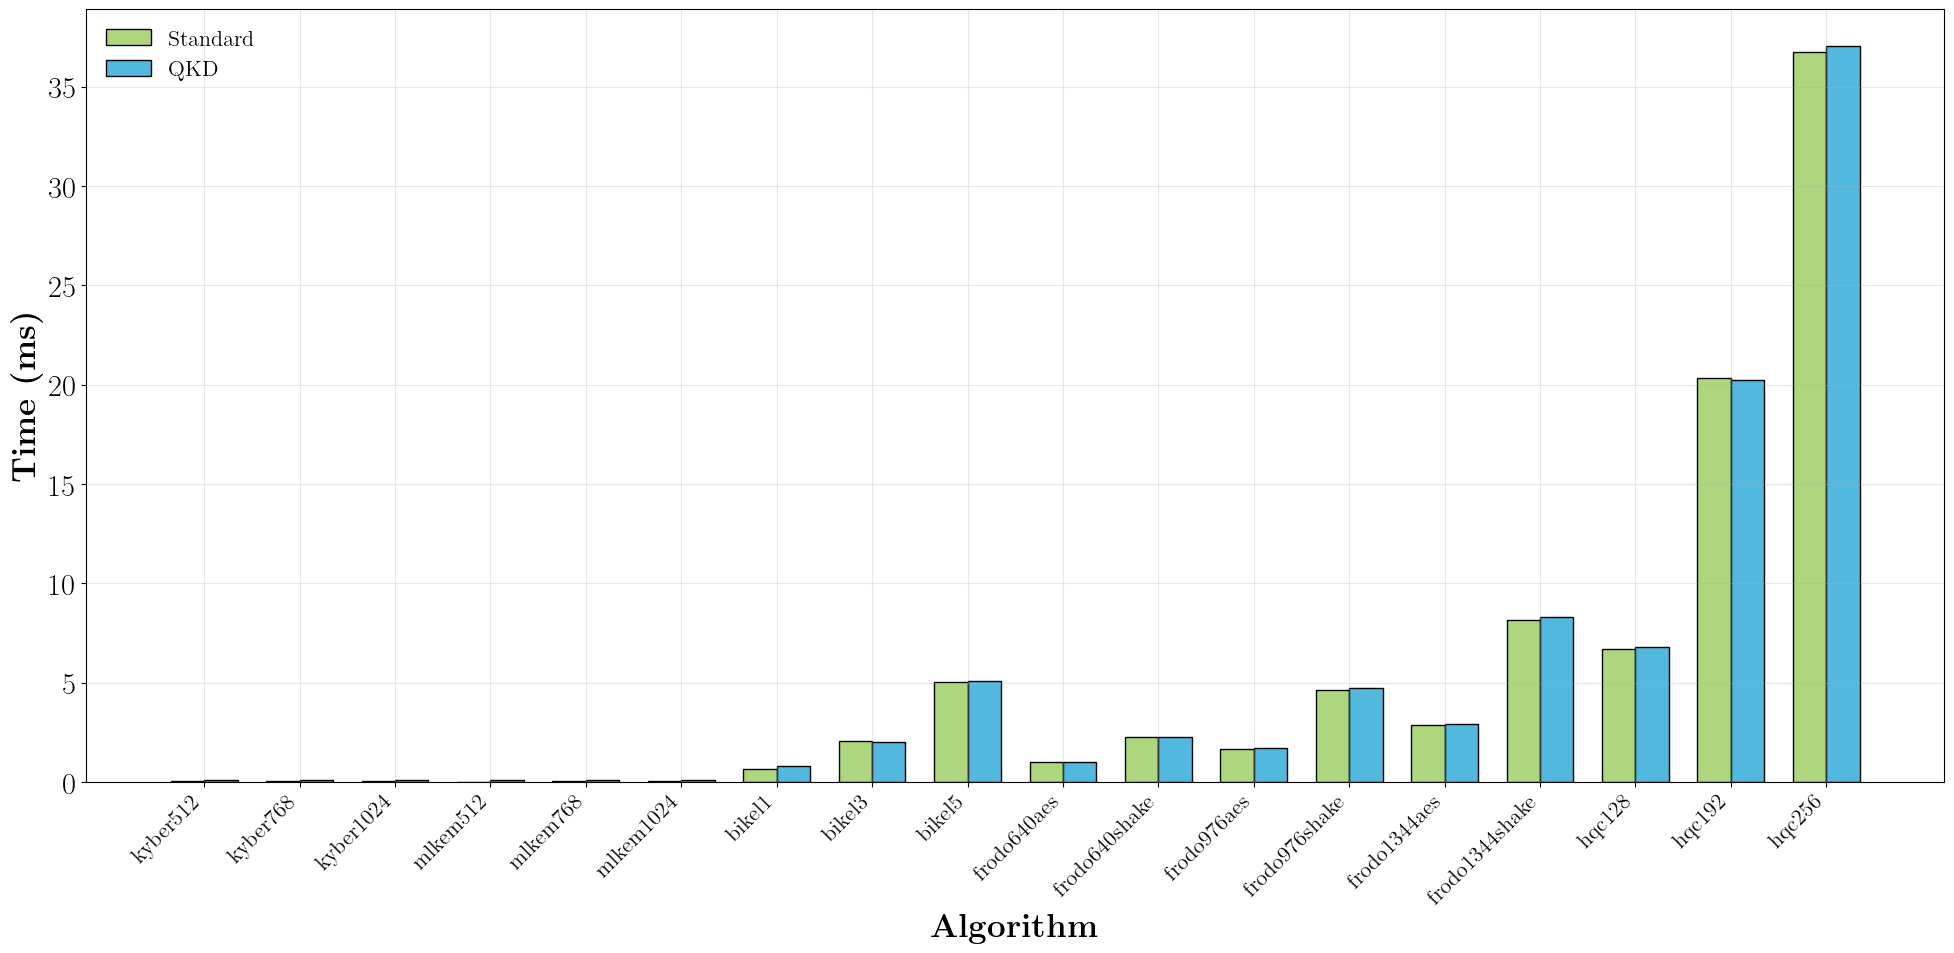

In [21]:
plot_kem_comparison(comparison_stats=compare_stats, family=None, overhead=False, plot_title="kems_comparison.pdf")

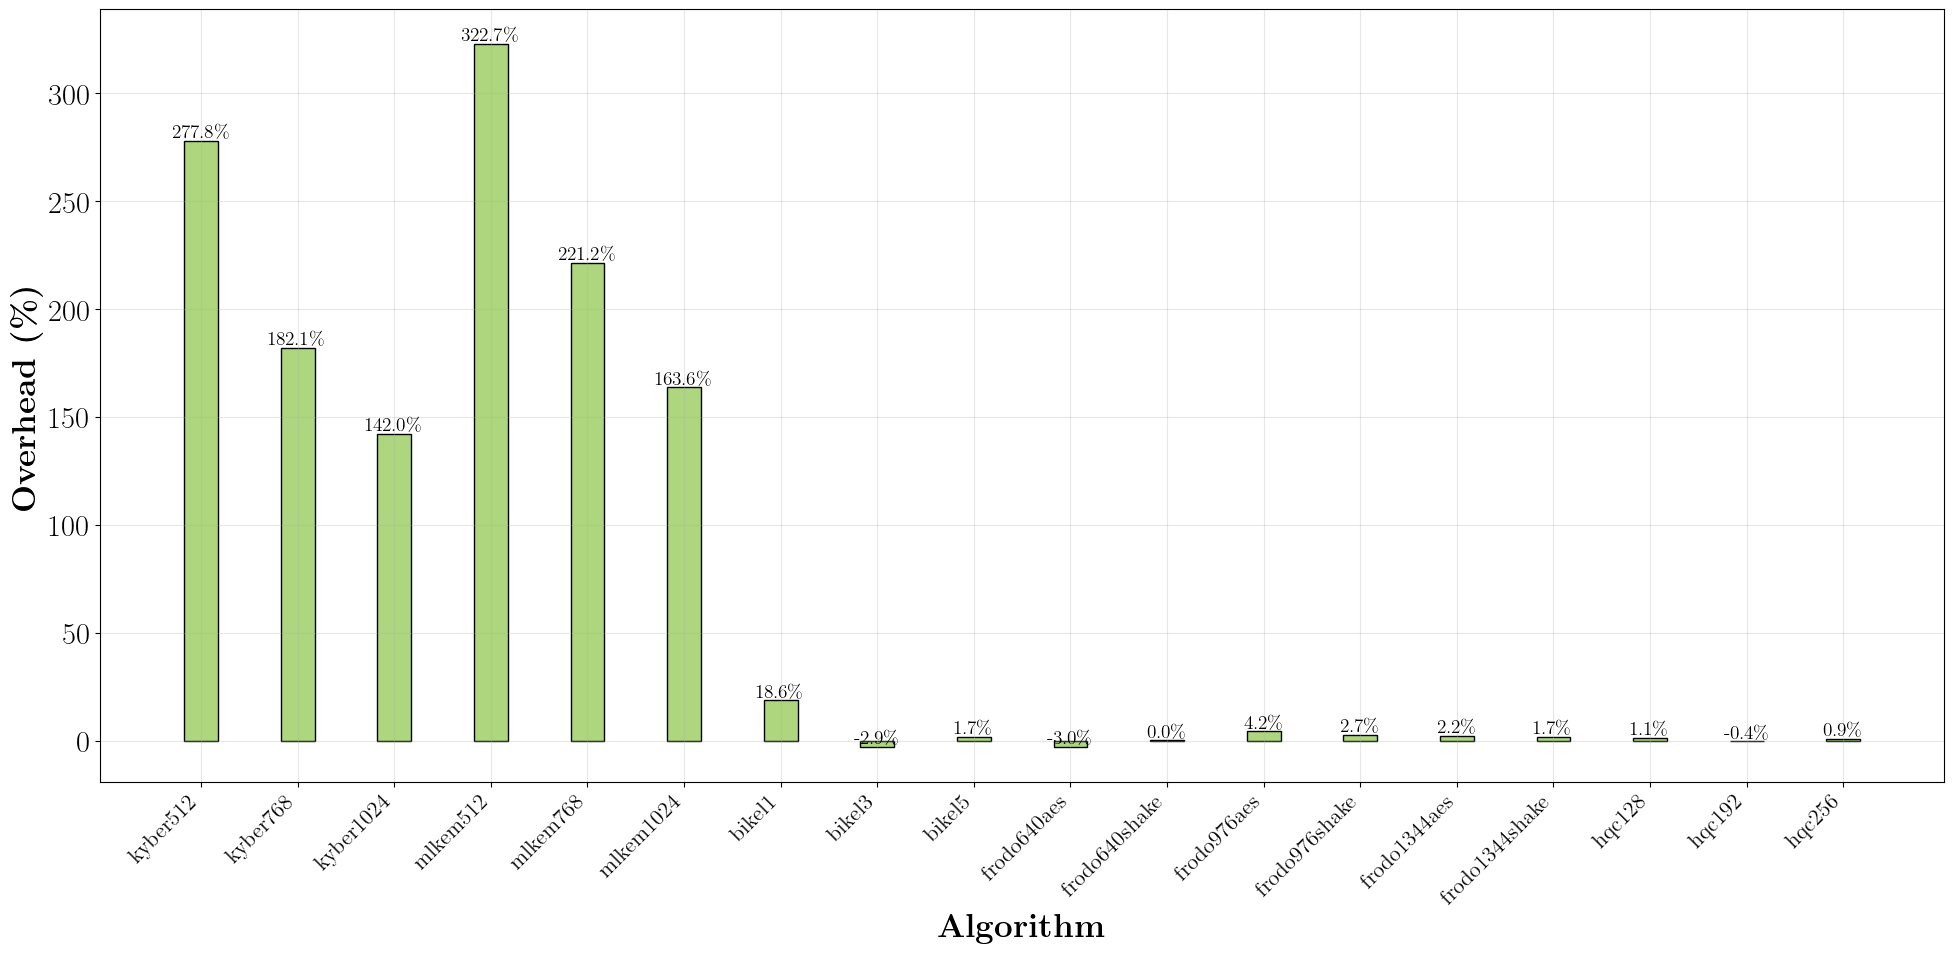

In [22]:
plot_kem_comparison(comparison_stats=compare_stats, family=None, overhead=True, plot_title="kems_comparison_overhead.pdf")